#Linearna regresija

In [122]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sn
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# 1. Učitavanje i pregled podataka

In [123]:
data = pd.read_csv("AirQualityUCI.csv")
print(data.info())
print(data.head(5))

data = data[["Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

In [124]:
print(data.describe())

# U datasetu se nalaze vrijednosti tipa float (osim varijabli Date i Time). Npr. postoji 9357 NO2 varijabli čija je apsolutna sredina -34.21 uz standardnu devijaciju 126.94. Najveća izmjerena razina NO2 je -200. a najveća 340.

            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T           RH  \
count  9357.000000   9357.000000  9357.000000  9357.000000  9357.000000   
mean     58.148873   1391.479641   975.072032     9.778305    39.485380   
std     126.940455    467.210125   456.938184    43.203623    51.216145   
min    -200.000

In [125]:
print(data.isna().sum())

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64


In [126]:
data = data.replace(-200, np.nan)
print(data.isna().sum())
data1 = data.copy()

# Zamjena vrijednosti -200 s NaN dovela je do puno većeg broja nedostajućih vrijednosti u varijablama CO, NMHC i NO2.

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64


In [127]:
# Odabir varijabli CO(GT) (ugljikov monoksid, zavisna varijabla y) i C6H6(GT) (benzen, nezavisna varijabla x) - nedostajuće vrijednosti su uklonjene

data_cleaned1 = data.dropna(subset=["CO(GT)", "C6H6(GT)"])
print(data_cleaned1.isna().sum())
data_cleaned1 = data_cleaned1[["CO(GT)", "C6H6(GT)"]]
print(data_cleaned1.head())

# Odabir varijabli za drugi model NO2(GT) (koncentracija dušikovog dioksida, zavisna varijabla y) i C6H6(GT) (benzen, nezavisna varijabla x) - nedostajuće vrijednosti su uklonjene
data_cleaned2 = data1.dropna(subset=['NO2(GT)', 'C6H6(GT)'])
print(data_cleaned2.isna().sum())
data_cleaned2 = data_cleaned2[['NO2(GT)', 'C6H6(GT)']]
print(data_cleaned2.head())

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         6481
C6H6(GT)            0
PT08.S2(NMHC)       0
NO2(GT)           403
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
   CO(GT)  C6H6(GT)
0     2.6      11.9
1     2.0       9.4
2     2.2       9.0
3     2.2       9.2
4     1.6       6.5
Date                0
Time                0
CO(GT)            452
PT08.S1(CO)         0
NMHC(GT)         6542
C6H6(GT)            0
PT08.S2(NMHC)       0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
   NO2(GT)  C6H6(GT)
0    113.0      11.9
1     92.0       9.4
2    114.0       9.0
3    122.0       9.2
4    116.0       6.5


# 2. Definiranje hipoteza i odabir varijabli za regresiju

## Model A ["CO(GT)", "C6H6(GT)"]

Postoji značajna linearna veza između koncentracije ugljikovog monoksida i benzena (odbacujemo nultu hipotezu).


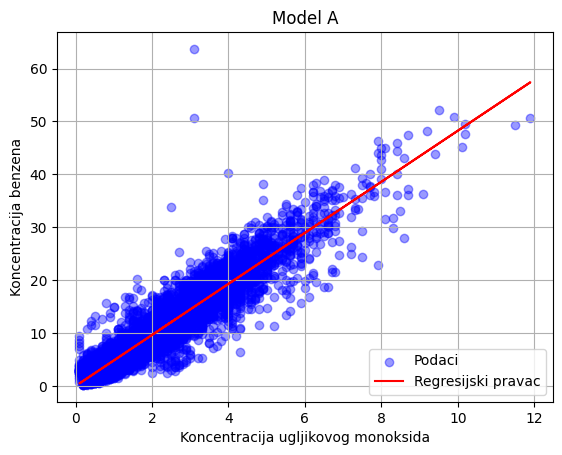

In [128]:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(data_cleaned1["CO(GT)"], data_cleaned1["C6H6(GT)"])
intercept_err1 = stats.linregress(data_cleaned1["CO(GT)"], data_cleaned1["C6H6(GT)"]).intercept_stderr

if p_value1 < 0.05:
    print("Postoji značajna linearna veza između koncentracije ugljikovog monoksida i benzena (odbacujemo nultu hipotezu).")
else:
    print("Nema dovoljno dokaza za postojanje značajne linearne veze koncentracije ugljikovog monoksida i benzena (ne odbacujemo nultu hipotezu).")

# Dodavanje regresijskog pravca

y_pred1 = intercept1 + slope1 * data_cleaned1["CO(GT)"]

plt.scatter(data_cleaned1["CO(GT)"], data_cleaned1["C6H6(GT)"], color='blue', label='Podaci', alpha=0.4)
plt.plot(data_cleaned1["CO(GT)"], y_pred1, color='red', label='Regresijski pravac')
plt.xlabel('Koncentracija ugljikovog monoksida')
plt.ylabel('Koncentracija benzena')
plt.title('Model A')
plt.legend()
plt.grid()
plt.show()

Parametri i interpretacija

In [129]:
print("Model A\n")
print(f"Nagib (slope): {slope1}")
print(f"Značenje nagiba: Koncentracija benzena prosječno se mijenja za {slope1:.4f} za svako povećanje koncentracije ugljikovog dioksida.")
print(f"Odsječak (intercept): Kada je koncentracije ugljikovog monoksida 0, onda je koncentracija benzena {intercept1}")
print(f"R^2: {r_value1**2:.4f}")
print("Koncentracija ugljikovog monoksida objašnjava oko 46% varijabilnosti benzena.")
print(f"Jednadžba: yA = {intercept1:.4f} + {slope1:.4f}*x1")

Model A

Nagib (slope): 4.8230797869745725
Značenje nagiba: Koncentracija benzena prosječno se mijenja za 4.8231 za svako povećanje koncentracije ugljikovog dioksida.
Odsječak (intercept): Kada je koncentracije ugljikovog monoksida 0, onda je koncentracija benzena 0.0039676312425793725
R^2: 0.8669
Koncentracija ugljikovog monoksida objašnjava oko 46% varijabilnosti benzena.
Jednadžba: yA = 0.0040 + 4.8231*x1


Intervali povjerenja za parametre

In [130]:
confidence_level1 = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level1) / 2, df=n-2)
margin_of_error = t_critical * std_err1
lower_bound = slope1 - margin_of_error
upper_bound = slope1 + margin_of_error
print("S 95% sigurnošću vjerujemo da je stvarni nagib između {:.4f} i {:.4f}.".format(lower_bound, upper_bound))

confidence_level = 0.95
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error11 = t_critical * intercept_err1
lower_bound11 = intercept1 - margin_of_error11
upper_bound11 = intercept1 + margin_of_error11
print(f"S 95% sigurnosti možemo tvrditi da se intercept (odsječak na osi y) modela A nalazi u intervalu: <{lower_bound11:.4f}, {upper_bound11:.4f}>")

# Interval ne uključuje 0 - nagib je značajan, postoji linearna veza između varijabli.

S 95% sigurnošću vjerujemo da je stvarni nagib između 4.7798 i 4.8663.
S 95% sigurnosti možemo tvrditi da se intercept (odsječak na osi y) modela A nalazi u intervalu: <-0.1071, 0.1150>


Reziduali

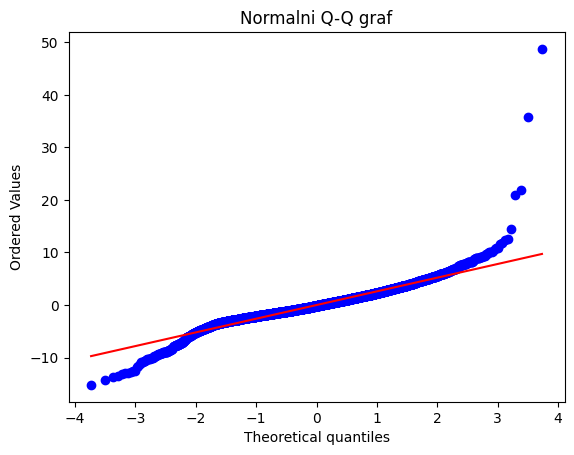

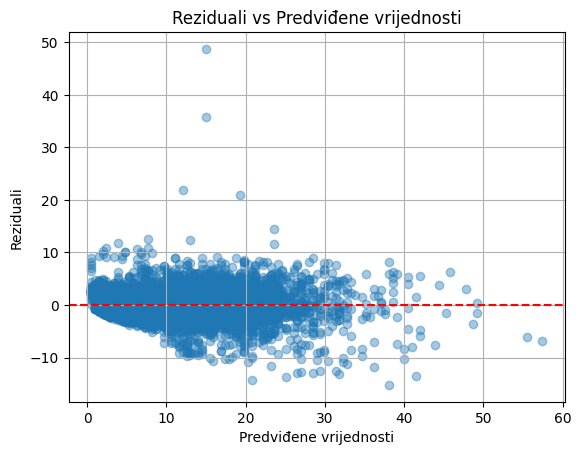

Reziduali nemaju sličnu raspršenost duž cijelog raspona predviđenih vrijednosti. Prema tome, pretpostavlja se da homoskedastičnost nije zadovoljena.


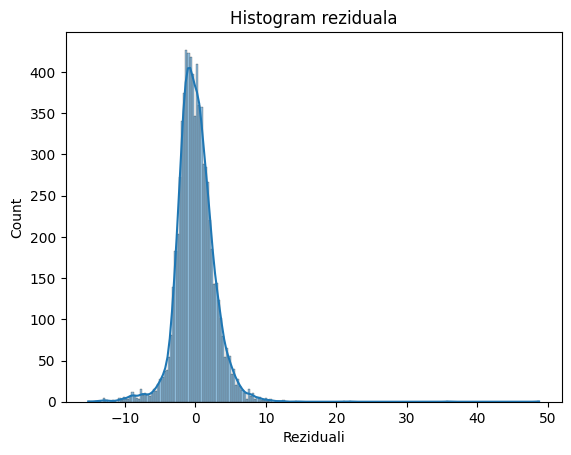

Vrijednosti reziduala praze normalnu distribuciju.


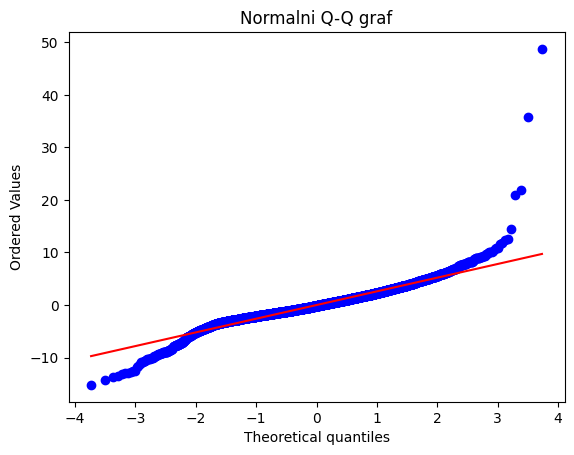

Većina reziduala pada blizu dijagonale na Q–Q grafu, što znači da su približno normalno raspoređeni. Repovi pomalo odstupaju i prisutni su outlieri.


In [131]:
# Reziduali
# data_cleaned1["CO(GT)"], data_cleaned1["C6H6(GT)"]
residuals1 = data_cleaned1["C6H6(GT)"] - (intercept1 + slope1 * data_cleaned1["CO(GT)"])
fitted_values1 = intercept1 + slope1 * data_cleaned1["CO(GT)"]

plt.figure()
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Normalni Q-Q graf')
plt.show()

plt.scatter(fitted_values1, residuals1, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Reziduali vs Predviđene vrijednosti')
plt.grid()
plt.show()
print("Reziduali nemaju sličnu raspršenost duž cijelog raspona predviđenih vrijednosti. Prema tome, pretpostavlja se da homoskedastičnost nije zadovoljena.")

sns.histplot(residuals1, kde=True)
plt.xlabel('Reziduali')
plt.title('Histogram reziduala')
plt.show()
print("Vrijednosti reziduala praze normalnu distribuciju.")

plt.figure()
stats.probplot(residuals1, dist="norm", plot=plt)
plt.title('Normalni Q-Q graf')
plt.show()
print("Većina reziduala pada blizu dijagonale na Q–Q grafu, što znači da su približno normalno raspoređeni. Repovi pomalo odstupaju i prisutni su outlieri.")

Pearsonov koeficijent korelacija

In [132]:
# data_cleaned1["CO(GT)"], data_cleaned1["C6H6(GT)"]

r_value, p_value_scipy = stats.pearsonr(data_cleaned1["CO(GT)"], data_cleaned1["C6H6(GT)"])

print(f"Pearsonov koeficijent korelacije r = {r_value:.4f}")
print(f"p-vrijednost (iz scipy.pearsonr) = {p_value_scipy:.6f}")

# 2. Testiranje hipoteze H0: ρ = 0 pomoću t-statistike
t_stat = r_value * np.sqrt((n - 2) / (1 - r_value**2))
df = n - 2
p_value_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"\nt-statistika = {t_stat:.4f}")
print(f"Stupnjevi slobode = {df}")
print(f"p-vrijednost (iz t-statistike) = {p_value_t:.6f}")

# 3. Odluka na razini značajnosti 5%
if p_value_t < 0.05:
    print("\nZaključak: p < 0.05 → odbacujemo H0.")
    print("Postoji statistički značajna linearna veza između ugljikovog monoksida i benzena.")
else:
    print("\nZaključak: p ≥ 0.05 → ne odbacujemo H0.")
    print("Nema dovoljno dokaza za značajnu linearnu vezu između ugljikovog monoksida i benzena.")

# Navedene varijable su snažno i pozitivno povezane (dok raste vrijednost dušikovog dioksida, raste i vrijednost benzena)

Pearsonov koeficijent korelacije r = 0.9311
p-vrijednost (iz scipy.pearsonr) = 0.000000

t-statistika = 248.3479
Stupnjevi slobode = 9469
p-vrijednost (iz t-statistike) = 0.000000

Zaključak: p < 0.05 → odbacujemo H0.
Postoji statistički značajna linearna veza između ugljikovog monoksida i benzena.


In [133]:
X = sm.add_constant(data_cleaned1["CO(GT)"])
model = sm.OLS(data_cleaned1["C6H6(GT)"], X).fit()

# 2. Ispis cijelog modela
print(model.summary())

# 3. Izdvajanje F-test informacija
F_statistic = model.fvalue
p_value_F = model.f_pvalue

print(f"\nF-statistika: {F_statistic:.4f}")
print(f"p-vrijednost (F-test): {p_value_F:.6f}")

# 4. Odluka na razini značajnosti 5%
alpha = 0.05
if p_value_F < alpha:
    print("Zaključak: Model je statistički značajan (odbacujemo H0).")
else:
    print("Zaključak: Model nije statistički značajan (ne odbacujemo H0).")

                            OLS Regression Results                            
Dep. Variable:               C6H6(GT)   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                 4.782e+04
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:00:36   Log-Likelihood:                -17754.
No. Observations:                7344   AIC:                         3.551e+04
Df Residuals:                    7342   BIC:                         3.553e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0040      0.057      0.070      0.9

## Model B ['NO2(GT)', 'C6H6(GT)']

0.0
Postoji značajna linearna veza između koncentracije dušikovog dioksida i benzena (odbacujemo nultu hipotezu).


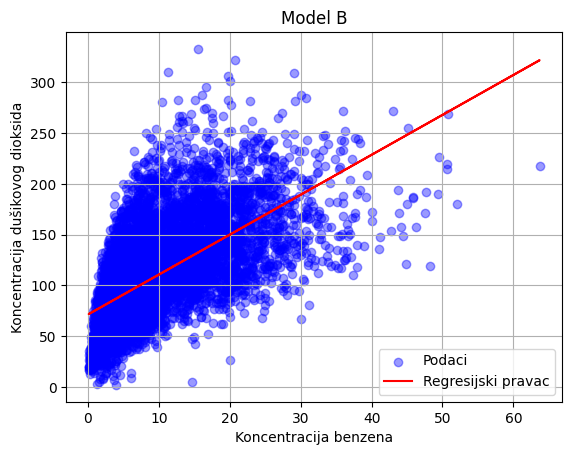

In [134]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(data_cleaned2["C6H6(GT)"], data_cleaned2['NO2(GT)'])
intercept_err2 = stats.linregress(data_cleaned2["C6H6(GT)"], data_cleaned2['NO2(GT)']).intercept_stderr

print(p_value2)
if p_value2 < 0.05:
    print("Postoji značajna linearna veza između koncentracije dušikovog dioksida i benzena (odbacujemo nultu hipotezu).")
else:
    print("Nema dovoljno dokaza za postojanje značajne linearne veze koncentracije dušikovog dioksida i benzena (ne odbacujemo nultu hipotezu).")


y_pred2 = intercept2 + slope2 * data_cleaned2["C6H6(GT)"]

plt.scatter(data_cleaned2["C6H6(GT)"], data_cleaned2['NO2(GT)'], color='blue', label='Podaci', alpha=0.4)
plt.plot(data_cleaned2["C6H6(GT)"], y_pred2, color='red', label='Regresijski pravac')
plt.xlabel('Koncentracija benzena')
plt.ylabel('Koncentracija dušikovog dioksida')
plt.title('Model B')
plt.legend()
plt.grid()
plt.show()

Parametri i interpretacija

In [135]:
print("Model B\n")
print(f"Nagib (slope): {slope2}")
print(f"Značenje nagiba: Koncentracija benzena prosječno se mijenja za {slope2:.4f} za svako povećanje koncentracije ugljikovog dioksida.")
print(f"Odsječak (intercept): Kada je koncentracije ugljikovog monoksida 0, onda je koncentracija benzena {intercept2}")
print(f"R^2: {r_value2**2:.4f}")
print("Koncentracija ugljikovog monoksida objašnjava oko 46% varijabilnosti benzena.")
print(f"Jednadžba: yB = {intercept2:.4f} + {slope2:.4f}*x2")

Model B

Nagib (slope): 3.932254069947594
Značenje nagiba: Koncentracija benzena prosječno se mijenja za 3.9323 za svako povećanje koncentracije ugljikovog dioksida.
Odsječak (intercept): Kada je koncentracije ugljikovog monoksida 0, onda je koncentracija benzena 71.3891030251398
R^2: 0.3776
Koncentracija ugljikovog monoksida objašnjava oko 46% varijabilnosti benzena.
Jednadžba: yB = 71.3891 + 3.9323*x2


Intervali povjerenja za parametre

In [136]:
n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error = t_critical * std_err2
lower_bound = slope2 - margin_of_error
upper_bound = slope2 + margin_of_error

# Interpretacija intervala povjerenja
print("S 95% sigurnošću vjerujemo da je stvarni nagib između {:.4f} i {:.4f}.".format(lower_bound, upper_bound))

n = len(data)
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=n-2)
margin_of_error11 = t_critical * intercept_err2
lower_bound11 = intercept2 - margin_of_error11
upper_bound11 = intercept2 + margin_of_error11
print(f"S 95% sigurnosti možemo tvrditi da se intercept (odsječak na osi y) modela A nalazi u intervalu: <{lower_bound11:.4f}, {upper_bound11:.4f}>")

# Interval ne uključuje 0 - nagib je značajan, postoji linearna veza između varijabli.

S 95% sigurnošću vjerujemo da je stvarni nagib između 3.8171 i 4.0474.
S 95% sigurnosti možemo tvrditi da se intercept (odsječak na osi y) modela A nalazi u intervalu: <69.9203, 72.8579>


Reziduali

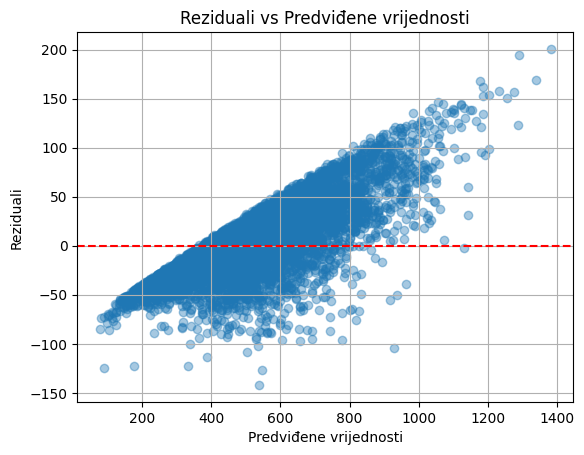

Reziduali nemaju sličnu raspršenost duž cijelog raspona predviđenih vrijednosti. Prema tome, pretpostavlja se da homoskedastičnost nije zadovoljena.


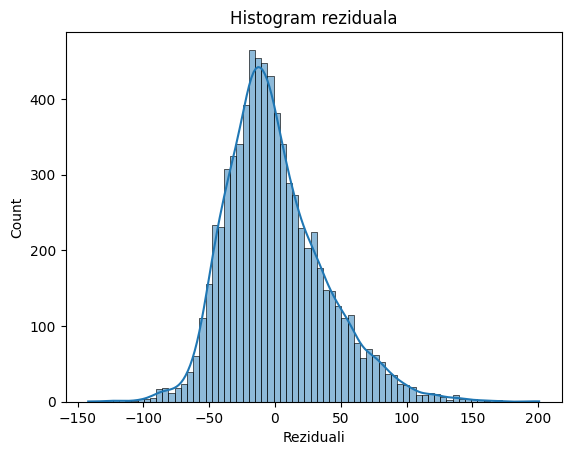

Vrijednosti reziduala je blizu normalne distribucije.


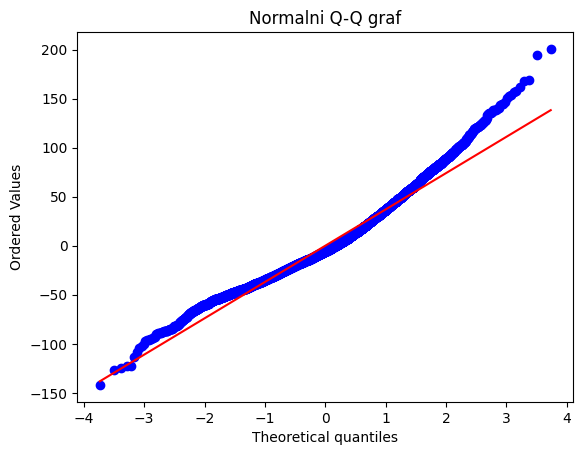

Većina reziduala pada blizu dijagonale na Q–Q grafu, što znači da su približno normalno raspoređeni. Repovi pomalo odstupaju.


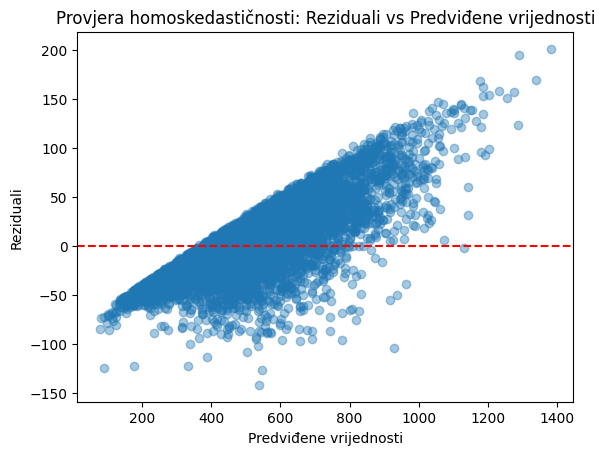

Reziduali nemaju sličnu raspršenost duž predviđenih vrijednosti - nije prisutna homoskedastičnost


In [137]:
# Reziduali
# data_cleaned2["C6H6(GT)"], data_cleaned2['NO2(GT)']
residuals2 = data_cleaned2['NO2(GT)'] - (intercept2 + slope2 * data_cleaned2["C6H6(GT)"])
fitted_values2 = intercept2 + slope2 * data_cleaned2['NO2(GT)']

plt.scatter(fitted_values2, residuals2, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Reziduali vs Predviđene vrijednosti')
plt.grid()
plt.show()
print("Reziduali nemaju sličnu raspršenost duž cijelog raspona predviđenih vrijednosti. Prema tome, pretpostavlja se da homoskedastičnost nije zadovoljena.")

sns.histplot(residuals2, kde=True)
plt.xlabel('Reziduali')
plt.title('Histogram reziduala')
plt.show()
print("Vrijednosti reziduala je blizu normalne distribucije.")


plt.figure()
stats.probplot(residuals2, dist="norm", plot=plt)
plt.title('Normalni Q-Q graf')
plt.show()
print("Većina reziduala pada blizu dijagonale na Q–Q grafu, što znači da su približno normalno raspoređeni. Repovi pomalo odstupaju.")

plt.scatter(fitted_values2, residuals2, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predviđene vrijednosti')
plt.ylabel('Reziduali')
plt.title('Provjera homoskedastičnosti: Reziduali vs Predviđene vrijednosti')
plt.show()
print("Reziduali nemaju sličnu raspršenost duž predviđenih vrijednosti - nije prisutna homoskedastičnost")



Pearsonov koeficijent korelacija

In [138]:
# data_cleaned2["C6H6(GT)"], data_cleaned2['NO2(GT)']

r_value, p_value_scipy = stats.pearsonr(data_cleaned2["C6H6(GT)"], data_cleaned2['NO2(GT)'])

print(f"Pearsonov koeficijent korelacije r = {r_value:.4f}")
print(f"p-vrijednost (iz scipy.pearsonr) = {p_value_scipy:.6f}")

# 2. Testiranje hipoteze H0: ρ = 0 pomoću t-statistike
t_stat = r_value * np.sqrt((n - 2) / (1 - r_value**2))
df = n - 2
p_value_t = 2 * (1 - stats.t.cdf(abs(t_stat), df=df))

print(f"\nt-statistika = {t_stat:.4f}")
print(f"Stupnjevi slobode = {df}")
print(f"p-vrijednost (iz t-statistike) = {p_value_t:.6f}")

# 3. Odluka na razini značajnosti 5%
if p_value_t < 0.05:
    print("\nZaključak: p < 0.05 → odbacujemo H0.")
    print("Postoji statistički značajna linearna veza između benzena i dušikovog dioksida.")
else:
    print("\nZaključak: p ≥ 0.05 → ne odbacujemo H0.")
    print("Nema dovoljno dokaza za značajnu linearnu vezu između benzena i dušikovog dioksida.")

# Navedene varijable su umjereno i pozitivno povezane (dok raste vrijednost dušikovog dioksida, raste i vrijednost benzena)


Pearsonov koeficijent korelacije r = 0.6145
p-vrijednost (iz scipy.pearsonr) = 0.000000

t-statistika = 75.7902
Stupnjevi slobode = 9469
p-vrijednost (iz t-statistike) = 0.000000

Zaključak: p < 0.05 → odbacujemo H0.
Postoji statistički značajna linearna veza između benzena i dušikovog dioksida.


In [139]:
X = sm.add_constant(data_cleaned2["C6H6(GT)"])  # dodaj presjek
model = sm.OLS(data_cleaned2['NO2(GT)'], X).fit()

# 2. Ispis cijelog modela
print(model.summary())

# 3. Izdvajanje F-test informacija
F_statistic = model.fvalue
p_value_F = model.f_pvalue

print(f"\nF-statistika: {F_statistic:.4f}")
print(f"p-vrijednost (F-test): {p_value_F:.6f}")

# 4. Odluka na razini značajnosti 5%
alpha = 0.05
if p_value_F < alpha:
    print("Zaključak: Model je statistički značajan (odbacujemo H0).")
else:
    print("Zaključak: Model nije statistički značajan (ne odbacujemo H0).")

                            OLS Regression Results                            
Dep. Variable:                NO2(GT)   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4484.
Date:                Mon, 24 Nov 2025   Prob (F-statistic):               0.00
Time:                        09:00:39   Log-Likelihood:                -37300.
No. Observations:                7393   AIC:                         7.460e+04
Df Residuals:                    7391   BIC:                         7.462e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.3891      0.749     95.271      0.0

U navedenim modelima, prisutna je jača pozitivna korelacija između varijabli u modelu A - kada raste vrijednost ugljikovog monoksida, raste i vrijednost benzena. Točnije, za svako povećanje razine ugljikovog monoksida za 1, vrijednost benzena se povećava za 4.82. Oba modela su adekvatna prema F statističkom testu zbog čije smo p-vrijednosti imali dovoljno dokaza da odbacimo hipotezu da modeli nisu adekvatni.

# Deskriptivna statistika (opcionalno)

In [140]:
data = pd.read_csv("AirQualityUCI.csv")
data = data[["Date", "Time", "CO(GT)", "PT08.S1(CO)", "NMHC(GT)", "C6H6(GT)", "PT08.S2(NMHC)", "NO2(GT)", "PT08.S4(NO2)", "PT08.S5(O3)", "T", "RH", "AH"]]

data = data.replace(-200, np.nan)
print(data.isna().sum())
data1 = data.copy()

data_cleaned = data.dropna(subset=["CO(GT)", "C6H6(GT)", "NO2(GT)", "PT08.S4(NO2)"])
print(data_cleaned.isna().sum())
data_cleaned = data_cleaned[["CO(GT)", "C6H6(GT)", "NO2(GT)", "PT08.S4(NO2)"]]
print(data_cleaned.head())

Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64
Date                0
Time                0
CO(GT)              0
PT08.S1(CO)         0
NMHC(GT)         6114
C6H6(GT)            0
PT08.S2(NMHC)       0
NO2(GT)             0
PT08.S4(NO2)        0
PT08.S5(O3)         0
T                   0
RH                  0
AH                  0
dtype: int64
   CO(GT)  C6H6(GT)  NO2(GT)  PT08.S4(NO2)
0     2.6      11.9    113.0        1692.0
1     2.0       9.4     92.0        1559.0
2     2.2       9.0    114.0        1555.0
3     2.2       9.2    122.0        1584.0
4     1.6       6.5    116.0        1490.0


In [141]:
print(data_cleaned.describe()) # apsoulutne srednje vrijednosti pod "mean" i std devijacija (odstupanja) pod "std"
print(data_cleaned.std()/data_cleaned.mean()) # koeficijenti varijacije - relativna raspršenost podataka, najveća varijabilnost pojavljuje se kod varijable C6H6

            CO(GT)     C6H6(GT)      NO2(GT)  PT08.S4(NO2)
count  6941.000000  6941.000000  6941.000000   6941.000000
mean      2.182467    10.554488   113.874082   1452.648898
std       1.441158     7.465226    47.475017    353.301576
min       0.100000     0.200000     2.000000    551.000000
25%       1.100000     4.900000    79.000000   1207.000000
50%       1.900000     8.800000   110.000000   1457.000000
75%       2.900000    14.600000   142.000000   1683.000000
max      11.900000    63.700000   333.000000   2775.000000
CO(GT)          0.660334
C6H6(GT)        0.707304
NO2(GT)         0.416908
PT08.S4(NO2)    0.243212
dtype: float64


Text(0.5, 1.0, 'PT08.S4(NO2)')

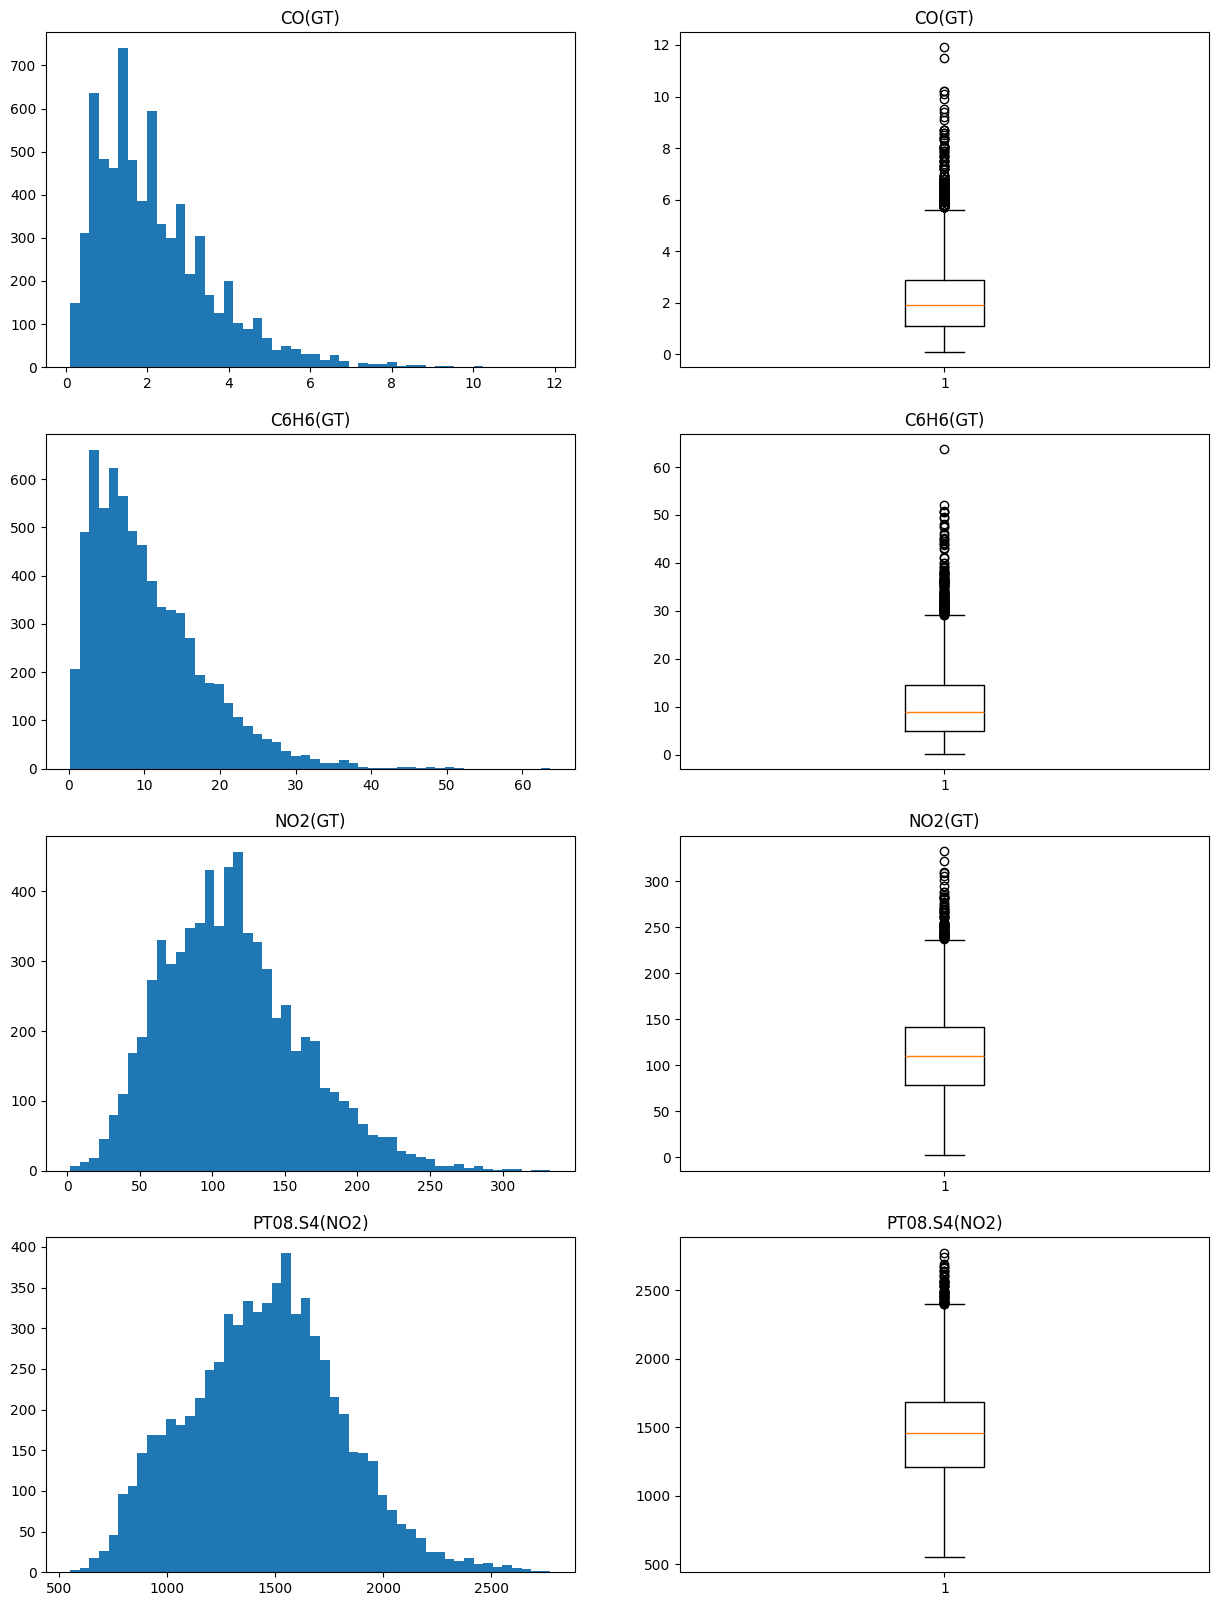

In [142]:
plt.figure(figsize=(15,20))

# data_cleaned[["CO(GT)", "C6H6(GT)", "NO2(GT)", "PT08.S4(NO2)"]]

plt.subplot(4,2,1)
plt.hist(data_cleaned['CO(GT)'], bins=50)
plt.title("CO(GT)")

plt.subplot(4,2,2)
plt.boxplot(data_cleaned['CO(GT)'])
plt.title("CO(GT)")

plt.subplot(4,2,3)
plt.hist(data_cleaned['C6H6(GT)'], bins=50)
plt.title("C6H6(GT)")

plt.subplot(4,2,4)
plt.boxplot(data_cleaned['C6H6(GT)'])
plt.title("C6H6(GT)")

plt.subplot(4,2,5)
plt.hist(data_cleaned['NO2(GT)'], bins=50)
plt.title("NO2(GT)")

plt.subplot(4,2,6)
plt.boxplot(data_cleaned['NO2(GT)'])
plt.title("NO2(GT)")

plt.subplot(4,2,7)
plt.hist(data_cleaned['PT08.S4(NO2)'], bins=50)
plt.title("PT08.S4(NO2)")

plt.subplot(4,2,8)
plt.boxplot(data_cleaned['PT08.S4(NO2)'])
plt.title("PT08.S4(NO2)")

# Sve varijable imaju sličnu varijabilnost u podacima, no malo je više izražena kod PT08.S4 vrijednosti.
# Outlieri su najviše prisutni kod CO i  C6H6 varijable.
# Ove varijable su odabrane zbog procjene kvalitete zraka i jer sadrže decimalne brojeve (dok npr. varijabla "time" ne bi bila pogodna za vizualizaciju o opis).
